# Bhurtpore Inn - Trip Advisor Analysis

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

# DataFrame

In [2]:
df = pd.read_csv('df.csv').drop(['Unnamed: 0'], axis=1)

# Finished Model

In [3]:
import joblib

In [4]:
# joblib.dump(pipe, 'model.pkl')

In [5]:
model = joblib.load('model.pkl')

# Analysis

In [6]:
coefficients = model['logisticregression'].coef_
features = model['columntransformer'].get_feature_names()
classes = model['logisticregression'].classes_

In [7]:
# pd.DataFrame(coefficients, index=features, columns=classes).iloc[10:40]

In [8]:
importance = pd.DataFrame(coefficients.T, index=features, columns=classes)

In [9]:
display(importance.head())
importance.shape

,1,2,3,4,5
review_year__x0_2011,-0.010896,-0.023107,-0.030828,-0.268474,0.333305
review_year__x0_2012,-0.241136,0.316208,0.094406,0.036598,-0.206076
review_year__x0_2013,-0.202123,0.282774,-0.199807,0.141696,-0.022541
review_year__x0_2014,-0.492064,0.209762,0.429208,-0.319853,0.172947
review_year__x0_2015,0.432104,-0.023248,-0.271074,0.055898,-0.193680


(2477, 5)

In [10]:
def magnitude(i, d):
    if abs(i) >= d:
        return i
    else:
        return np.nan

In [11]:
importance3 = importance.copy()
for i in importance3.columns:
    importance3[i] = importance3[i].apply(magnitude, args=(0.3,))

point3 = importance3.dropna(how='all')
indices3 = point3.index
point3

,1,2,3,4,5
review_year__x0_2011,NaN,NaN,NaN,NaN,0.333305
review_year__x0_2012,NaN,0.316208,NaN,NaN,NaN
review_year__x0_2014,-0.492064,NaN,0.429208,-0.319853,NaN
review_year__x0_2015,0.432104,NaN,NaN,NaN,NaN
review_year__x0_2016,0.504499,-0.380914,NaN,NaN,NaN
...,...,...,...,...,...
visit_month__x0_8.0,0.427689,-0.335337,0.646694,NaN,-0.712068
visit_month__x0_9.0,NaN,NaN,-0.321940,NaN,0.359757
visit_month__x0_10.0,NaN,NaN,NaN,0.375065,-0.529807
visit_month__x0_11.0,NaN,NaN,NaN,-0.316926,0.461528


In [12]:
importance5 = importance.copy()
for i in importance5.columns:
    importance5[i] = importance5[i].apply(magnitude, args=(0.5,))

point5 = importance5.dropna(how='all')
indices5 = point5.index
point5

,1,2,3,4,5
review_year__x0_2016,0.504499,NaN,NaN,NaN,NaN
review_year__x0_2020,0.659526,NaN,NaN,NaN,NaN
review_month__x0_1,0.818376,NaN,NaN,NaN,NaN
review_month__x0_2,NaN,0.586301,NaN,NaN,NaN
review_month__x0_3,0.827834,NaN,NaN,NaN,NaN
review_month__x0_4,NaN,NaN,0.857366,NaN,NaN
review_month__x0_11,NaN,NaN,NaN,0.580746,NaN
platform__x0_non-mobile,-0.579395,NaN,NaN,NaN,NaN
headline__10,NaN,0.525739,NaN,NaN,NaN
headline__average,NaN,0.533782,0.557986,-0.546117,-0.504358


In [13]:
importance.loc['headline__curry']

1   -0.205840
2   -0.163647
3   -0.420646
4    0.545019
5    0.245114
Name: headline__curry, dtype: float64

In [14]:
importance.loc['post_text__curries']

1   -0.083552
2   -0.080207
3   -0.030748
4    0.429507
5   -0.235000
Name: post_text__curries, dtype: float64

In [15]:
importance55 = importance.copy()
for i in importance55.columns:
    importance55[i] = importance55[i].apply(magnitude, args=(0.55,))

point55 = importance55.dropna(how='all')
indices55 = point55.index
point55.shape

(36, 5)

In [16]:
print(importance.loc[point5.index, :].shape)
importance.loc[point5.index, :]

(46, 5)


,1,2,3,4,5
review_year__x0_2016,0.504499,-0.380914,0.061877,-0.061741,-0.123721
review_year__x0_2020,0.659526,-0.212457,-0.171302,-0.184529,-0.091238
review_month__x0_1,0.818376,-0.233081,-0.292771,-0.105001,-0.187523
review_month__x0_2,-0.218675,0.586301,-0.342762,0.001920,-0.026785
review_month__x0_3,0.827834,-0.287371,-0.447368,-0.299553,0.206458
review_month__x0_4,-0.195518,-0.311945,0.857366,-0.211020,-0.138884
review_month__x0_11,-0.308608,-0.264545,-0.012751,0.580746,0.005159
platform__x0_non-mobile,-0.579395,-0.100832,0.060362,0.342657,0.277207
headline__10,-0.011258,0.525739,-0.038535,-0.068707,-0.407238
headline__average,-0.041293,0.533782,0.557986,-0.546117,-0.504358


#### Posts that relate to the curries are the real winners.

The posts that contain the word 'curry' in the title stand a much stronger chance of receiving a 5* review, with 3* reviews at a reduced likelihood and 4* reviews far less likely.

Similarly, use of 'night' in the headline hint strongly at a 5* classification. 

The words 'great' and 'meal' are highly suggestive of a 4* review.

Interestingly those who 

#### The word experience suggests a lower rating.

The fact that the use of the word experience in the post's main text body suggests a lower rating. Using intuition, I would suggest that when someone uses the word experience, they are talking negatively about a number of facets of the experience collectively. Those who speak positively more often than not give praise to each part of the business in turn.

#### The highest rated months for the pub are July and October.

Most of the year there is a relatively neutral spread of review classifications. However, as summer begins, we begin to see a spike of much more consistently 4* reviews. As we enter July, there appear to be considerably less 4* reviews and considerably more 5* reviews. The pub does well in the summer, with the beer garden being a great asset. August seems to have notably fewer 5* reviews, with many more 3* and 4* reviews being registered on Trip Advisor.

Most of the other months have less extreme trends with regards the months (i.e. coefficients lower than 0.5.), although October shows similar character to July, in that the numbers of 5* reviews incline greatly.

#### 2014 was a particularly mediocre year.

Of the years that have registered reviews on Trip Advisor, the two that stand out particularly are 2014 and 2020.

2014 shows a large disparity in the numbers of 3* and 4* reviews - there being far more 3* reviews and far less 4* reviews comparatively when compared with other years.

2020 on the other had, shows a much larger number of 4* reviews than 3*, showing 2020 to be perhaps one of the best years to date on average review rating. This may be down to strict following and upholding of COVID19 guidelines.

In [17]:
importance6 = importance.copy()
for i in importance6.columns:
    importance6[i] = importance6[i].apply(magnitude, args=(0.6,))

point6 = importance6.dropna(how='all')
point6.index
point6

,1,2,3,4,5
review_year__x0_2020,0.659526,NaN,NaN,NaN,NaN
review_month__x0_1,0.818376,NaN,NaN,NaN,NaN
review_month__x0_3,0.827834,NaN,NaN,NaN,NaN
review_month__x0_4,NaN,NaN,0.857366,NaN,NaN
headline__best,NaN,NaN,NaN,NaN,0.885459
headline__disappointing,2.063729,NaN,NaN,-0.860042,-1.212025
headline__evening,NaN,NaN,NaN,0.845461,-0.650023
headline__gem,NaN,NaN,NaN,NaN,0.674274
headline__good,NaN,NaN,NaN,1.222632,NaN
headline__great,NaN,NaN,NaN,0.706990,NaN


# Business Insights

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df.corr()

,rating,review_year,review_month,visit_year,visit_month
rating,1.000000,0.031867,0.017557,0.045958,-0.062080
review_year,0.031867,1.000000,-0.099004,0.995278,-0.056154
review_month,0.017557,-0.099004,1.000000,-0.066495,0.776730
visit_year,0.045958,0.995278,-0.066495,1.000000,-0.081601
visit_month,-0.062080,-0.056154,0.776730,-0.081601,1.000000


Looking at correlations between variables, things are generally as expected. However, one feature I was keen to examine a relationship between was any disparity in visiting date and review date.

As shown above, the Pearson correlation between `review month` and `visit month` is 0.78, which suggests that some of the reviews were left some time after the visit. The data will be subsetted based on the difference and examined for inner trends.

In [20]:
dates = df.copy()

In [21]:
dates['month_match'] = dates.review_month == dates.visit_month

In [22]:
same_months = dates[dates.month_match==True]

In [23]:
next_months = dates[dates.month_match==False]

In [24]:
next_months.rating.value_counts()

5    53
4    21
3     4
1     2
2     2
Name: rating, dtype: int64

In [25]:
same_months.rating.value_counts()

5    139
4     59
3     15
2      7
1      1
Name: rating, dtype: int64

In [26]:
months_df = pd.DataFrame(next_months.rating.value_counts(normalize=True))

In [27]:
months_df.columns=['next']

In [28]:
months_df['same'] = same_months.rating.value_counts(normalize=True)

In [29]:
months_df

,next,same
5,0.646341,0.628959
4,0.256098,0.266968
3,0.048780,0.067873
1,0.024390,0.004525
2,0.024390,0.031674


<AxesSubplot:title={'center':'Normalized Comparison of Same Month vs. Different Month for Reviews & Visits'}>

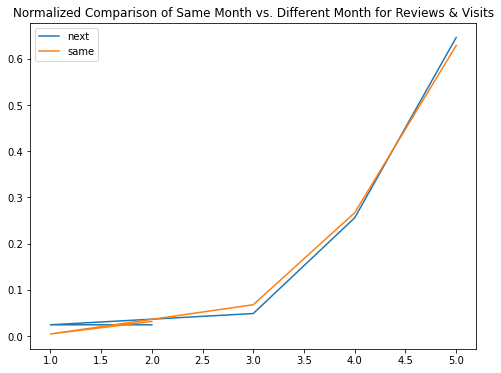

In [30]:
months_df.plot(kind='line', title='Normalized Comparison of Same Month vs. Different Month for Reviews & Visits', figsize=(8, 6 ))

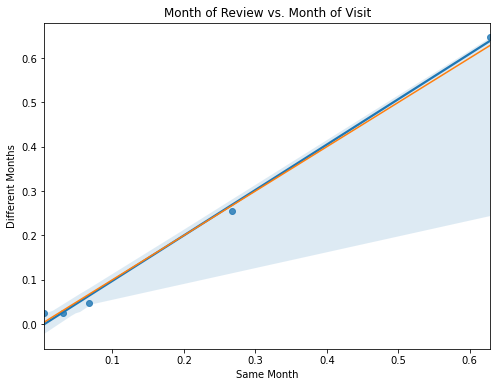

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(data=months_df, x='same', y='next')
ax.set(xlabel='Same Month', ylabel= 'Different Months', title='Month of Review vs. Month of Visit')

x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

The Seaborn plot above shows the relationship between immediate and non-immediate review of the experience. Initially my hypothesis had been that there may have been more emotional reflection in the case of immediate review (i.e. greater abundance in the extremities of the rating scale), and perhaps more carefully considered review in the non-immediate review cases (more of an even distribution). However, as can be seen in the diagram titled 'Month of Review vs. Month of Visit', there is little fluctuation in the ratings of customers.

In [32]:
month_diff = next_months[['review_month', 'visit_month']]

In [33]:
month_diff['month_diff'] = abs(month_diff.review_month - month_diff.visit_month)

<ipython-input-33-8f178ae2bf48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_diff['month_diff'] = abs(month_diff.review_month - month_diff.visit_month)


In [34]:
month_diff

,review_month,visit_month,month_diff
1,7,6.0,1.0
3,11,10.0,1.0
18,11,10.0,1.0
19,11,9.0,2.0
33,7,6.0,1.0
...,...,...,...
290,6,5.0,1.0
292,4,3.0,1.0
294,3,10.0,7.0
295,2,10.0,8.0


In [35]:
point6.index

Index(['review_year__x0_2020', 'review_month__x0_1', 'review_month__x0_3',
       'review_month__x0_4', 'headline__best', 'headline__disappointing',
       'headline__evening', 'headline__gem', 'headline__good',
       'headline__great', 'headline__place', 'headline__sanitised',
       'headline__traced', 'headline__track', 'post_text__beer',
       'post_text__excellent', 'post_text__good', 'post_text__waited',
       'visit_year__x0_2014.0', 'visit_year__x0_2020.0', 'visit_month__x0_2.0',
       'visit_month__x0_7.0', 'visit_month__x0_8.0'],
      dtype='object')

In [36]:
['review_year__x0_2020', 'review_month__x0_1', 'review_month__x0_3',
       'review_month__x0_4', 'headline__best', 'headline__disappointing',
       'headline__evening', 'headline__gem', 'headline__good',
       'headline__great', 'headline__place', 'headline__sanitised',
       'headline__traced', 'headline__track', 'post_text__beer',
       'post_text__excellent', 'post_text__good', 'post_text__waited',
       'visit_year__x0_2014.0', 'visit_year__x0_2020.0', 'visit_month__x0_2.0',
       'visit_month__x0_7.0', 'visit_month__x0_8.0']

['review_year__x0_2020',
 'review_month__x0_1',
 'review_month__x0_3',
 'review_month__x0_4',
 'headline__best',
 'headline__disappointing',
 'headline__evening',
 'headline__gem',
 'headline__good',
 'headline__great',
 'headline__place',
 'headline__sanitised',
 'headline__traced',
 'headline__track',
 'post_text__beer',
 'post_text__excellent',
 'post_text__good',
 'post_text__waited',
 'visit_year__x0_2014.0',
 'visit_year__x0_2020.0',
 'visit_month__x0_2.0',
 'visit_month__x0_7.0',
 'visit_month__x0_8.0']

Ignoring adjectives, being obvious pointers towards the sentiment of the rating itself, the keywords that provide most influence to the model's outcomes are as below:

REVIEW YEAR
2020

REVIEW MONTH
1
3
4

HEADLINE
best
disappointing
evening
gem
good
great
place
sanitised
traced
track

POST TEXT
beer
excellent
good
waited

VISIT YEAR
2014
2020

VISIT MONTH
2
7
8

Ignoring adjectives, being obvious pointers towards the sentiment of the rating itself, the keywords that provide most influence to the model's outcomes are as below:


| HEADLINE | POST TEXT | REVIEW MONTH | REVIEW YEAR | VISIT MONTH | VISIT YEAR |
| --- | --- | --- | --- | --- | --- |
| best | beer | 1 | 2020 | 2 | 2014 |
| disappointing | excellent | 3 | | 7 | 2020 |
| evening | good | 4 | | 8 | |
| gem | waited | | | | |
| good | | | | | |
| great | | | | | |
| place | | | | | |
| sanitised | | | | | |
| traced | | | | | |
| track | | | | | |

Ignoring adjectives, being obvious pointers towards the sentiment of the rating itself, the keywords that provide most influence to the model's outcomes are as below:


| HEADLINE | POST TEXT | REVIEW MONTH | REVIEW YEAR | VISIT MONTH | VISIT YEAR |
| --- | --- | --- | --- | --- | --- |
| evening | beer | 1 | 2020 | 2 | 2014 |
| gem | waited | 3 | | 7 | 2020 |
| place | | 4 | | 8 | |
| sanitised | | | | | |
| traced | | | | | |
| track | | | | | |

In [37]:
importance45 = importance.copy()
for i in importance45.columns:
    importance45[i] = importance45[i].apply(magnitude, args=(0.45,))

point45 = importance45.dropna(how='all')
indices45 = point45.index
point45

,1,2,3,4,5
review_year__x0_2014,-0.492064,NaN,NaN,NaN,NaN
review_year__x0_2016,0.504499,NaN,NaN,NaN,NaN
review_year__x0_2020,0.659526,NaN,NaN,NaN,NaN
review_month__x0_1,0.818376,NaN,NaN,NaN,NaN
review_month__x0_2,NaN,0.586301,NaN,NaN,NaN
review_month__x0_3,0.827834,NaN,NaN,NaN,NaN
review_month__x0_4,NaN,NaN,0.857366,NaN,NaN
review_month__x0_8,NaN,-0.476458,NaN,NaN,NaN
review_month__x0_11,NaN,NaN,NaN,0.580746,NaN
platform__x0_non-mobile,-0.579395,NaN,NaN,NaN,NaN


Giving the criteria for the absolute value of the coefficients to be examined as at least 0.45 slims down the number of features within the focus to 60.

Ignoring adjectives, being obvious pointers towards the sentiment of the rating itself, the keywords that provide most influence to the model's outcomes are as below:



In [38]:
# point45.index

In [39]:
['review_year__x0_2014', 'review_year__x0_2016', 'review_year__x0_2020',
       'review_month__x0_1', 'review_month__x0_2', 'review_month__x0_3',
       'review_month__x0_4', 'review_month__x0_8', 'review_month__x0_11',
       
 'platform__x0_non-mobile'
 
 'headline__10',
       'headline__beer','headline__bother', 'headline__curry',  
       'headline__evening', 'headline__expected', 'headline__gem',
       'headline__grub', 'headline__night', 'headline__ok', 'headline__place',
       'headline__pub', 'headline__sanitised', 'headline__service', 
       'headline__superb', 'headline__traced', 'headline__track', 
 
 'post_text__ales', 'post_text__bar', 'post_text__beer', 'post_text__choice', 
       'post_text__excellent', 'post_text__fantastic', 'post_text__lots', 
       'post_text__real', 'post_text__veg', 'post_text__waited', 
 
 'visit_year__x0_2014.0', 'visit_year__x0_2019.0',
       'visit_year__x0_2020.0', 'visit_month__x0_1.0', 'visit_month__x0_2.0',
       'visit_month__x0_7.0', 'visit_month__x0_8.0', 'visit_month__x0_10.0',
       'visit_month__x0_11.0', 'visit_month__x0_12.0']

['review_year__x0_2014',
 'review_year__x0_2016',
 'review_year__x0_2020',
 'review_month__x0_1',
 'review_month__x0_2',
 'review_month__x0_3',
 'review_month__x0_4',
 'review_month__x0_8',
 'review_month__x0_11',
 'platform__x0_non-mobileheadline__10',
 'headline__beer',
 'headline__bother',
 'headline__curry',
 'headline__evening',
 'headline__expected',
 'headline__gem',
 'headline__grub',
 'headline__night',
 'headline__ok',
 'headline__place',
 'headline__pub',
 'headline__sanitised',
 'headline__service',
 'headline__superb',
 'headline__traced',
 'headline__track',
 'post_text__ales',
 'post_text__bar',
 'post_text__beer',
 'post_text__choice',
 'post_text__excellent',
 'post_text__fantastic',
 'post_text__lots',
 'post_text__real',
 'post_text__veg',
 'post_text__waited',
 'visit_year__x0_2014.0',
 'visit_year__x0_2019.0',
 'visit_year__x0_2020.0',
 'visit_month__x0_1.0',
 'visit_month__x0_2.0',
 'visit_month__x0_7.0',
 'visit_month__x0_8.0',
 'visit_month__x0_10.0',
 'visit_mo

The features removed from further insight analysis are as follows.

Adjectives
| HEADLINE |
| --- |
| average |
| best |
| disappointed |
| disappointing |
| excellent |
| expected |
| fantastic |
| gem |
| good |
| great |
| lovely |
| nice |
| ok |
| poor |
| superb |

| POST TEXT |
| --- |
| best |
| excellent | 
| fantastic | 
| good |


<!-- Contextual -->



The rationale behind seletion of features for removal was any adjectives that denote sentiment, any words that bear little meaning without context or provides no way of relating business aspects to sentiment of customers.

In [40]:
df[df.headline.str.contains('track')]

,username,rating,review_year,review_month,platform,headline,post_text,visit_year,visit_month
10,cheshiremike09,1,2020,8,mobile,Sanitised track and traced,Sanitised track and traced waited at the bar.....,2020.0,8.0
145,johnhC5403QI,5,2016,4,non-mobile,Real Ale Mecca with Home Brewed Curries off th...,Organised by my wife's friends one Saturday. T...,2016.0,3.0


In [41]:
df.iloc[10].headline

'Sanitised track and traced'

In [42]:
df.iloc[145].headline

'Real Ale Mecca with Home Brewed Curries off the beaten track'

In [43]:
col = ['review_year__x0_2014', 'review_year__x0_2016', 'review_year__x0_2020',
       'review_month__x0_1', 'review_month__x0_2', 'review_month__x0_3',
       'review_month__x0_4', 'review_month__x0_8', 'review_month__x0_11',
       'platform__x0_non-mobile', 
       'headline__10', 'headline__beer','headline__bother', 'headline__curry',
       'headline__evening', 'headline__grub', 'headline__night', 'headline__place',
       'headline__pub', 'headline__sanitised', 'headline__service', 
       'headline__traced', 'headline__track',
       'post_text__ales', 'post_text__bar', 'post_text__beer', 'post_text__choice', 
       'post_text__lots', 'post_text__real', 'post_text__veg', 'post_text__waited', 
       'visit_year__x0_2014.0', 'visit_year__x0_2019.0',
       'visit_year__x0_2020.0', 'visit_month__x0_1.0', 'visit_month__x0_2.0',
       'visit_month__x0_7.0', 'visit_month__x0_8.0', 'visit_month__x0_10.0',
       'visit_month__x0_11.0', 'visit_month__x0_12.0']

review_year_cols = ['review_year__x0_2014', 'review_year__x0_2016', 'review_year__x0_2020']

review_month_cols = ['review_month__x0_1', 'review_month__x0_2', 'review_month__x0_3',
       'review_month__x0_4', 'review_month__x0_8', 'review_month__x0_11']

platform_cols = ['platform__x0_non-mobile']

headline_cols = ['headline__10', 'headline__beer','headline__bother', 'headline__curry',
       'headline__evening', 'headline__grub', 'headline__night',
       'headline__place', 'headline__pub', 'headline__sanitised', 'headline__service', 
       'headline__traced', 'headline__track']

post_text_cols = ['post_text__ales', 'post_text__bar', 'post_text__beer', 'post_text__choice', 
       'post_text__lots', 'post_text__real', 'post_text__veg', 'post_text__waited']

visit_year_cols = ['visit_year__x0_2014.0', 'visit_year__x0_2019.0',
       'visit_year__x0_2020.0']

visit_month_cols = ['visit_month__x0_1.0', 'visit_month__x0_2.0',
       'visit_month__x0_7.0', 'visit_month__x0_8.0', 'visit_month__x0_10.0',
       'visit_month__x0_11.0', 'visit_month__x0_12.0']

In [44]:
feature_review = importance.loc[col]
features_r_y = importance.loc[review_year_cols]
features_r_m = importance.loc[review_month_cols]
features_platform = importance.loc[platform_cols]
features_headline = importance.loc[headline_cols]
features_post = importance.loc[post_text_cols]
features_v_y = importance.loc[visit_year_cols]
features_v_m = importance.loc[visit_month_cols]

In [45]:
features_platform

,1,2,3,4,5
platform__x0_non-mobile,-0.579395,-0.100832,0.060362,0.342657,0.277207


In [46]:
importance.loc[['platform__x0_mobile']]

,1,2,3,4,5
platform__x0_mobile,0.419797,-0.057456,-0.146322,-0.233732,0.017714


#### There is a positive relationship between non-mobile review and rating.
We see above that those who leave reviews by computer tend to leave bettwe reviews, with the most common review being 4, and then 5 stars, and the least likely review being 1 star. A number of assumptions can be drawn from this, including that those who leave reviews by mobile may often be doing so for emotional reasons, i.e. where they feel they have been poorly treated and want to leave a mark against the business.
This appears true when comparing with the mobile coefficients as also seen above. There is a strong influence towards the 1 star ratings when done via mobile, with a general downwards trend.

Another assumption worth investigating further is that those who leave reviews are generally more tech-savvy or simply younger than those who leave them by computer. A more complex relationship between sentiment and platform might then ensue.

For example, those customers who are more elderly are more likely to be satisfied by services delivered by the Bhurtpore Inn than younger clientele. Younger clientele may have different requirements for waiting times and attentiveness of staff, due to work commitments, family pressures, stresses due to having children in tow or general expectation, whereas elderly customers on average have fewer external pressures and tend to follow a more leisurely pace.

This combined with the ease of leaving a review may give some indication as to why the coefficients have been decided as such by the model.

In [47]:
features_headline

,1,2,3,4,5
headline__10,-0.011258,0.525739,-0.038535,-0.068707,-0.407238
headline__beer,-0.118786,-0.204974,0.461927,0.417463,-0.555629
headline__bother,-0.013947,0.548454,-0.032190,-0.154164,-0.348154
headline__curry,-0.205840,-0.163647,-0.420646,0.545019,0.245114
headline__evening,-0.077311,-0.051704,-0.066423,0.845461,-0.650023
headline__grub,-0.127947,-0.079403,0.597797,-0.248036,-0.142411
headline__night,-0.203570,-0.009532,-0.068307,0.538171,-0.256762
headline__place,-0.066383,-0.074584,-0.093539,-0.414543,0.649049
headline__pub,-0.226856,-0.354974,-0.004330,0.584465,0.001695
headline__sanitised,0.830323,-0.042811,-0.211323,-0.160441,-0.415749


Features pertaining to the headline section of posts show a number of interesting importances. The headline presents one of the most vital pieces of information - the true sentiment of the customer in as concise a format as possible. Here, words are sparingly used and will provide possibly more insight than the body of text itself, since the words contextually

The coefficients above suggest that beer alone will not earn the pub a 5* rating. Anything predominantly beer related is most likely to be awarded a 3-4* rating. If a headline is beer-centric, it is inherently less likely that someone will offer a 5* review for the pub as a whole, given that the two separate offerings are either not taken simultaneously into consideration, or that the food was not rated as highly as the beer (the thinking here is that the food is the most important factor in influencing the complete experience due to pricing and accuracy and care required to get it right - a badly kept beer is more forgivable than a badly cooked meal).

Looking further down the list we see curry

### IDEA

Could write a program that adds up different combinations of coefficients to see the likelihood of each rating normalised. I.e., see the low performance areas, and highest performance areas in terms of consistency and investigate the reasons why.

This would take a relative amount of personal deicison making and filtering out certain, perhaps pre-defined scenarios (i.e. pub, beer, curry, service, night vs. pub, beer, service, day). Does removing the curry, or further food altogether affect service? Is service in the daytime worse than that at the nighttime due to lack of engagement? Or is the reserve true, with evening numbers being greater and therefore more moving parts to keep tabs on.

In [48]:
df[df.headline.str.contains('10')].headline

233    Two for £10
Name: headline, dtype: object

In [49]:
df[df.headline.str.contains('beer')].rating

2      5
22     4
83     4
98     5
99     3
103    4
116    5
129    4
137    5
141    5
163    4
166    5
213    5
223    4
229    5
246    5
256    5
267    5
289    5
292    4
301    5
Name: rating, dtype: int64

In [50]:
features_post

,1,2,3,4,5
post_text__ales,-0.107604,-0.098416,-0.214333,-0.133607,0.553960
post_text__bar,0.457714,0.116200,-0.171969,-0.359260,-0.042685
post_text__beer,-0.109488,-0.155376,-0.007995,-0.337799,0.610658
post_text__choice,-0.094550,-0.122915,-0.077977,-0.185821,0.481262
post_text__lots,-0.027719,-0.060897,-0.085835,-0.358214,0.532666
post_text__real,-0.140642,-0.001155,-0.123874,0.573748,-0.308078
post_text__veg,-0.068153,0.033814,0.148105,0.351595,-0.465361
post_text__waited,0.831482,-0.052019,-0.204127,-0.178275,-0.397062


## Post Features

Posts that are 